In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os, sys
import camb

# If you have many CAMB versions at your disposal, it's always useful to check which CAMB is being used.
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

# Matplotlib settings - Plots in Latex font
axislabelfontsize='large'
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [10.0,7.5]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 16,
})
axislabelfontsize='large'

Using CAMB 1.3.5 installed at /home/joaov/cosmo/CAMB/CAMBMultiFluidDE/camb


In [2]:
lcdmcosmology = camb.set_params(# Background
                                H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                                # Neutrinos
                                omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                                nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                                # Initial Power Spectrum
                                As = 2.100549e-09, ns = 0.9660499, 
                                YHe = 0.246, WantTransfer=True)
lcdmresults = camb.get_results(lcdmcosmology)
lcdmcls = lcdmresults.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]
ells = [i for i in range(len(lcdmcls))]
ks = lcdmresults.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
lcdmpks = lcdmresults.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]
scales = np.logspace(-6, 0)
rho, w = lcdmresults.get_dark_energy_rho_w(scales)
omega = lcdmresults.get_Omega('de', z = 1/scales - 1)

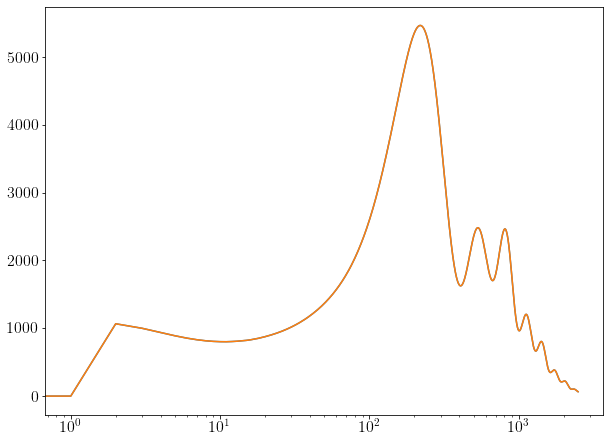

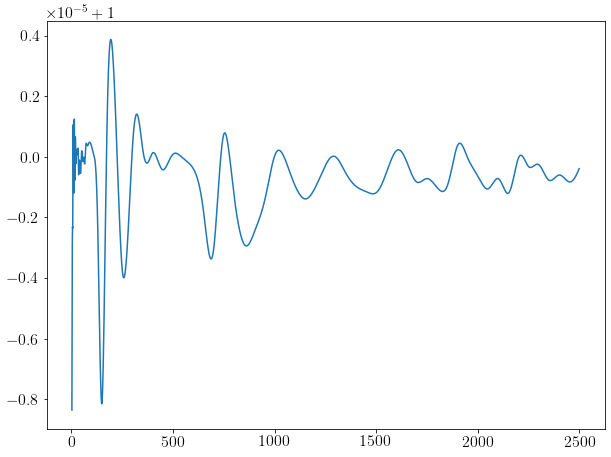

In [24]:
plt.semilogx(ells, lcdmcls_lin)
plt.semilogx(ells, lcdmcls_nl)
plt.show()
plt.plot(ells[2:], lcdmcls_nl[2:]/lcdmcls_lin[2:])

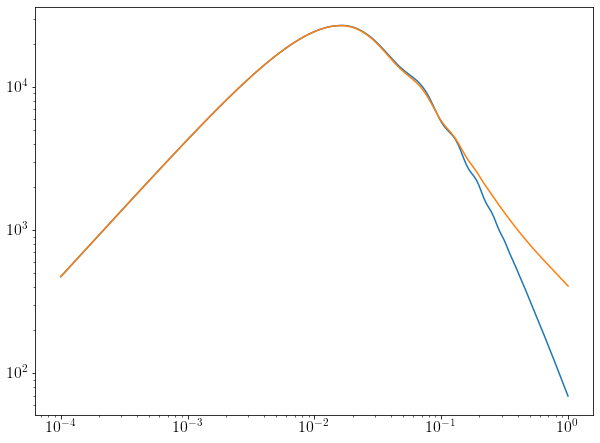

In [16]:
plt.loglog(ks, lcdmpks_linear[0])
plt.loglog(ks, lcdmpks_nonlinear[0])

In [6]:
lcdmcosmology = camb.set_params(# Background
                                H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                                # Neutrinos
                                omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                                nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                                # Initial Power Spectrum
                                As = 2.100549e-09, ns = 0.9660499, 
                                YHe = 0.246, WantTransfer=True, NonLinear=camb.model.NonLinear_both)
#lcdmcosmology.NonLinear = camb.model.NonLinear_none
lcdmresults = camb.get_results(lcdmcosmology)
lcdmcls_lin = lcdmresults.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]
ells = [i for i in range(len(lcdmcls_lin))]
ks = lcdmresults.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
lcdmpks_nonlinear = lcdmresults.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]
scales = np.logspace(-6, 0)
rho, w = lcdmresults.get_dark_energy_rho_w(scales)
omega = lcdmresults.get_Omega('de', z = 1/scales - 1)